In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchmetrics import Accuracy
import requests
import zipfile
from pathlib import Path
import os
import random
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [7]:
data_path = Path('data/')
image_path = data_path/ 'pizza_steak_sushi'

if image_path.is_dir():
    print(f'{image_path} directory already exists, skipping download')
else:
    print(f'{image_path} does not exists, creating one')
    image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip')
    print('Downloading Data')
    f.write(request.content)

# Unzip the file
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('Unzipping Data')
    zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists, skipping download
Unzipping Data


In [13]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'There are {len(dirnames)} and {len(filenames)} images in {dirpath}')

In [14]:
walk_through_dir(image_path)

There are 2 and 0 images in data\pizza_steak_sushi
There are 3 and 0 images in data\pizza_steak_sushi\test
There are 1 and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 and 1 images in data\pizza_steak_sushi\test\pizza\.ipynb_checkpoints
There are 0 and 19 images in data\pizza_steak_sushi\test\steak
There are 0 and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 and 0 images in data\pizza_steak_sushi\train
There are 0 and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 and 75 images in data\pizza_steak_sushi\train\steak
There are 0 and 72 images in data\pizza_steak_sushi\train\sushi


Random Image Path: data\pizza_steak_sushi\test\sushi\1172255.jpg
Image Class: sushi
Image Height: 383
Image Width: 512


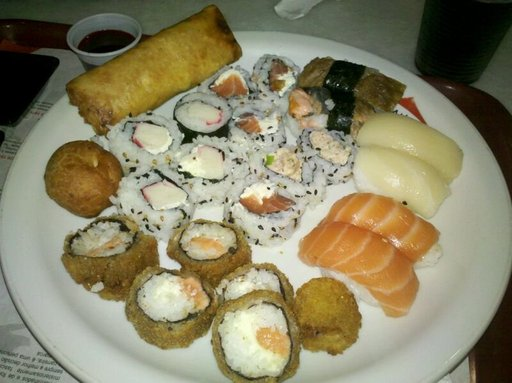

In [32]:
#random.seed(42)

# Get all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))

# Pick a random image path
random_image_path = random.choice(image_path_list)

# Get Image Class from Path Name (The Image Class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# Open Image
img = Image.open(random_image_path)

print(f'Random Image Path: {random_image_path}')
print(f'Image Class: {image_class}')
print(f'Image Height: {img.height}')
print(f'Image Width: {img.width}')
img

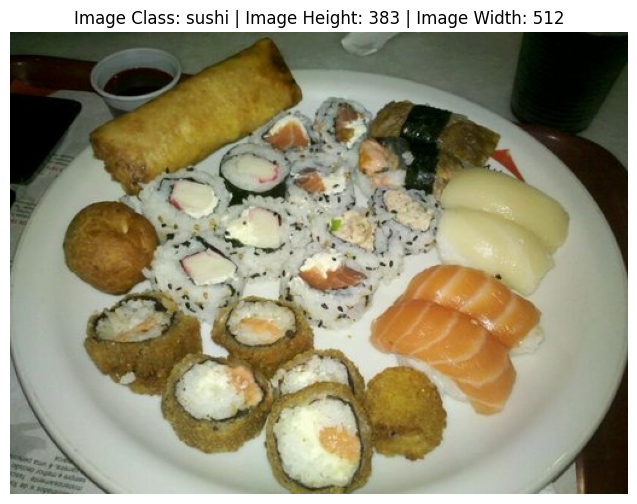

In [40]:
img_arr = np.asarray(img)
plt.figure(figsize=(10,6))
plt.imshow(img_arr)
plt.title(f'Image Class: {image_class} | Image Height: {img.height} | Image Width: {img.width}')
plt.axis(False)
plt.show()

<font size="6" color='pink'>Turning Images into Tensors</font>

<font size="4" color='yellow'>Transforming data with torchvision.transforms</font>

In [36]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [37]:
data_transform(img)

tensor([[[0.0431, 0.0471, 0.0510,  ..., 0.1216, 0.1098, 0.1059],
         [0.0078, 0.0078, 0.0039,  ..., 0.1373, 0.1294, 0.1216],
         [0.0078, 0.0078, 0.0039,  ..., 0.1412, 0.1216, 0.1176],
         ...,
         [0.1098, 0.1176, 0.1216,  ..., 0.4706, 0.4627, 0.4275],
         [0.1098, 0.1137, 0.1255,  ..., 0.4510, 0.4510, 0.4353],
         [0.0980, 0.1059, 0.1255,  ..., 0.4549, 0.4627, 0.4824]],

        [[0.0784, 0.0745, 0.0627,  ..., 0.1647, 0.1608, 0.1529],
         [0.0275, 0.0157, 0.0118,  ..., 0.1882, 0.1804, 0.1725],
         [0.0392, 0.0196, 0.0118,  ..., 0.1882, 0.1686, 0.1608],
         ...,
         [0.0471, 0.0627, 0.0706,  ..., 0.4980, 0.5020, 0.4588],
         [0.0471, 0.0627, 0.0784,  ..., 0.4902, 0.4863, 0.4627],
         [0.0510, 0.0706, 0.0784,  ..., 0.4980, 0.5059, 0.5059]],

        [[0.0431, 0.0392, 0.0353,  ..., 0.0941, 0.0941, 0.0941],
         [0.0039, 0.0039, 0.0039,  ..., 0.1059, 0.1020, 0.1020],
         [0.0039, 0.0078, 0.0039,  ..., 0.1020, 0.0941, 0.